In [1]:
import pickle
import blosc
import numpy as np
import matplotlib.pyplot as plt

with open('dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [2]:
print(f"numer of demos: {len(data)}")

numer of demos: 1000


In [3]:
mission_id = 506#np.random.randint(0, len(data))
print(f"Selected mission {mission_id}")

Selected mission 506


In [4]:
# the instruction (in this case it is always the same)
data[mission_id][0]

'open the door'

In [5]:
# this is the numeric state of the mission
numeric_state = blosc.unpack_array(data[mission_id][2])

# shape: number_of_steps x grid_size X grid_size X object_encoding
numeric_state.shape

(11, 22, 22, 3)

[[[2 5 0]
  [2 5 0]
  [2 5 0]
  ...
  [2 5 0]
  [2 5 0]
  [2 5 0]]

 [[2 5 0]
  [1 0 0]
  [1 0 0]
  ...
  [1 0 0]
  [1 0 0]
  [2 5 0]]

 [[2 5 0]
  [1 0 0]
  [1 0 0]
  ...
  [1 0 0]
  [1 0 0]
  [2 5 0]]

 ...

 [[2 5 0]
  [1 0 0]
  [1 0 0]
  ...
  [1 0 0]
  [1 0 0]
  [2 5 0]]

 [[2 5 0]
  [1 0 0]
  [1 0 0]
  ...
  [1 0 0]
  [1 0 0]
  [2 5 0]]

 [[2 5 0]
  [2 5 0]
  [2 5 0]
  ...
  [2 5 0]
  [2 5 0]
  [2 5 0]]]


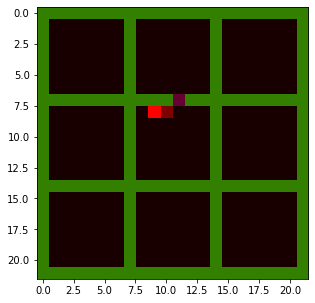

In [6]:
# Example initial numeric state (step=0)
print(numeric_state[0])
plt.figure(figsize=(5,5))
plt.imshow(numeric_state[0]/10)
plt.show()

In [7]:
# this is an additional compass-sensor (called direction) which the agent could use to navigate
# not sure if this is useful at this point
data[mission_id][3]

[3, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2]

In [8]:
# This is the sequence of actions the agent took
actions = list(map(lambda x: x.name, data[mission_id][4]))
actions

['right',
 'forward',
 'right',
 'forward',
 'right',
 'pickup',
 'forward',
 'left',
 'forward',
 'right',
 'toggle']

In [9]:
# In order to allow to explore what is actually done, this allows the view a graphical rendering of the sequence of steps taken
img = blosc.unpack_array(data[mission_id][1])

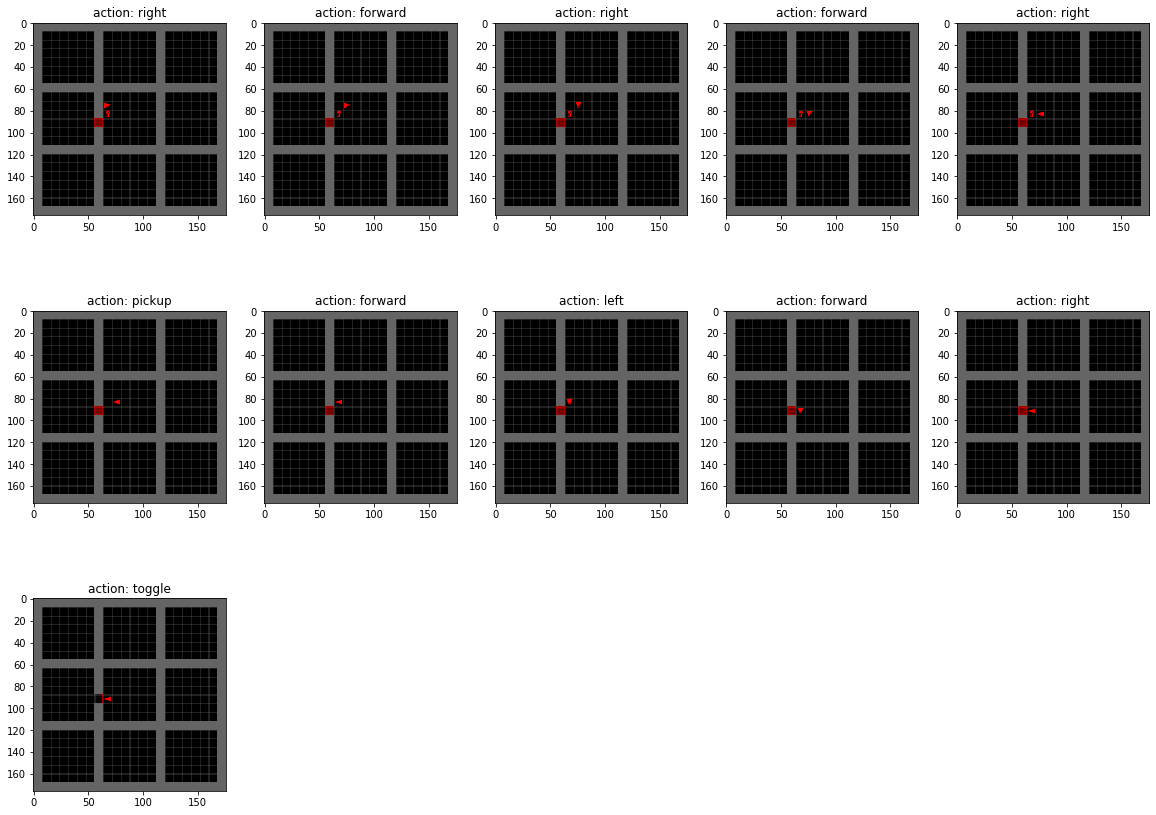

In [10]:
rows = int(np.ceil(len(img)/5))

plt.figure(figsize=(20,5*rows))

for i in range(len(img)):
    plt.subplot(rows,5,i+1)
    plt.title(f"action: {actions[i]}")
    plt.imshow(img[i])
 
plt.show()